In [1]:
import pandas as pd

df = pd.read_csv("Emotions in text.csv") 

def convert_emotion(label):
    if label in ['happy']:
        return 'happy'
    elif label in ['sadness']:
        return 'sadness'
    else:
        return 'other'

df['Emotion'] = df['Emotion'].apply(convert_emotion)

# Check the dataset
print('rows and columns:', df.shape)
print(df.head())
print(df['Emotion'].value_counts())

rows and columns: (21459, 2)
                                                Text  Emotion
0                            i didnt feel humiliated  sadness
1  i can go from feeling so hopeless to so damned...  sadness
2   im grabbing a minute to post i feel greedy wrong    other
3  i am ever feeling nostalgic about the fireplac...    other
4                               i am feeling grouchy    other
Emotion
other      8165
happy      7029
sadness    6265
Name: count, dtype: int64


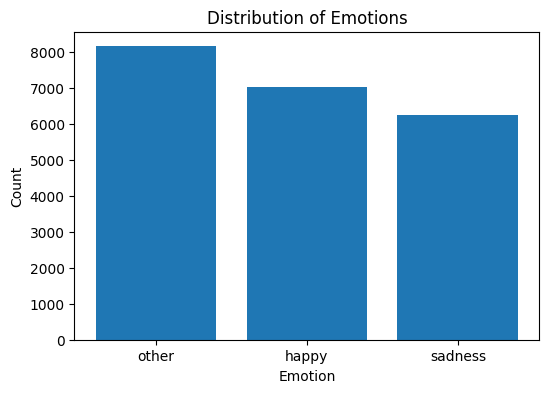

Dataset Description:
This dataset consists of two columns, Text and Emotions. Emotions column has various categories.
Each entry in the dataset represents a text message, along with an associated Emotion label.
Emotion categories include 'happy', 'sadness', 'anger', 'fear', 'love', 'surprise'.
happy : 33%
sadness : 29%
other('anger', 'fear', 'love', 'surprise') : 38%


In [2]:
import matplotlib.pyplot as plt

# Count the occurrences of each unique value in the 'Emotion' column
emotion_counts = df['Emotion'].value_counts()

# Create a bar plot
plt.figure(figsize=(6, 4))  # optional: Adjust the figure size as needed
plt.bar(emotion_counts.index, emotion_counts.values)

# Adding labels and title
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('Distribution of Emotions')

# Display the plot
plt.show()

# Dataset Description
print("Dataset Description:")
print("This dataset consists of two columns, Text and Emotions. Emotions column has various categories.")
print("Each entry in the dataset represents a text message, along with an associated Emotion label.")
print("Emotion categories include 'happy', 'sadness', 'anger', 'fear', 'love', 'surprise'.")
print("happy : 33%")
print("sadness : 29%")
print("other('anger', 'fear', 'love', 'surprise') : 38%")


In [3]:
import numpy as np
np.random.seed(1234)

# split df into train and test
i = np.random.rand(len(df)) < 0.8
train = df[i]
test = df[~i]
print("train data size: ", train.shape)
print("test data size: ", test.shape)

train data size:  (17171, 2)
test data size:  (4288, 2)


In [15]:
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder

# set up X and Y
num_labels = 3      # Total number of emotion categories
vocab_size = 25000  # Size of the vocabulary to consider
batch_size = 100    # Number of samples per gradient update

# fit the tokenizer on the training data
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(train.Text)

# convert texts to TF-IDF vectors (Text)
x_train = tokenizer.texts_to_matrix(train.Text, mode='tfidf')
x_test = tokenizer.texts_to_matrix(test.Text, mode='tfidf')

# fit the label encoder and transform emotion labels to integer labels (Emotion)
encoder = LabelEncoder()
encoder.fit(train.Emotion)
y_train = encoder.transform(train.Emotion)
y_test = encoder.transform(test.Emotion)

print("classes:", list(encoder.classes_))   

# check shape
print("train shapes:", x_train.shape, y_train.shape)
print("test shapes:", x_test.shape, y_test.shape)
print("test first ten labels:", y_test[:10])

classes: ['happy', 'other', 'sadness']
train shapes: (17171, 25000) (17171,)
test shapes: (4288, 25000) (4288,)
test first ten labels: [1 0 1 1 1 0 1 0 0 2]


In [16]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Convert texts to sequences of integers
x_train_seq = tokenizer.texts_to_sequences(train.Text)
x_test_seq = tokenizer.texts_to_sequences(test.Text)

# Determine max sequence length for padding
max_seq_length = max([len(seq) for seq in x_train_seq])

# Pad sequences to ensure uniform length
x_train_pad = pad_sequences(x_train_seq, maxlen=max_seq_length, padding='post')
x_test_pad = pad_sequences(x_test_seq, maxlen=max_seq_length, padding='post')

In [17]:
from tensorflow.keras import layers, models

max_features = 10000
batch_size = 32

model = models.Sequential()
model.add(layers.Embedding(max_features, 500)) 
model.add(layers.Conv1D(32, 7, activation='relu')) 
model.add(layers.MaxPooling1D(5)) 
model.add(layers.Conv1D(32, 7, activation='relu')) 
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(num_labels, activation='softmax'))

In [18]:
import tensorflow as tf

model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),  # set learning rate
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
from tensorflow.keras.utils import to_categorical

# convert labels to one-hot encoding format
y_train_cat = to_categorical(y_train, num_classes=num_labels)
y_test_cat = to_categorical(y_test, num_classes=num_labels)

# Train the model using the training data with one-hot encoded labels
history = model.fit(x_train_pad, y_train_cat,
                    epochs=30,
                    batch_size=128,
                    verbose=1,           
                    validation_split=0.2)

Epoch 1/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 8s 64ms/step - accuracy: 0.3659 - loss: 1.0946 - val_accuracy: 0.4049 - val_loss: 1.0928
Epoch 2/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - accuracy: 0.3763 - loss: 1.0880 - val_accuracy: 0.4049 - val_loss: 1.0915
Epoch 3/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step - accuracy: 0.3739 - loss: 1.0871 - val_accuracy: 0.4047 - val_loss: 1.0910
Epoch 4/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step - accuracy: 0.3815 - loss: 1.0850 - val_accuracy: 0.4084 - val_loss: 1.0900
Epoch 5/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step - accuracy: 0.4135 - loss: 1.0778 - val_accuracy: 0.4166 - val_loss: 1.0876
Epoch 6/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 7s 63ms/step - accuracy: 0.4352 - loss: 1.0698 - val_accuracy: 0.4323 - val_loss: 1.0842
Epoch 7/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 7s 61ms/step - accuracy: 0.4836 - loss: 1.0588 - val_accuracy: 0.4512 - val_loss: 1.0784
Epoch 8/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 7s 64ms/step - accuracy: 0.5357 - loss: 1.0393 - val_accu

In [20]:
# Evaluate
score = model.evaluate(x_test_pad, y_test_cat, batch_size=batch_size, verbose=1)
print('Accuracy: ', score[1])

134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9432 - loss: 0.1602
Accuracy:  0.9113805890083313


In [21]:
# get predictions so we can calculate more metrics
pred = model.predict(x_test_pad)

# Obtain the index of the highest probability category for each sample, which represents the predicted label
pred_labels = np.argmax(pred, axis=1)

134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('accuracy score: ', accuracy_score(y_test, pred_labels))
print('precision score: ', precision_score(y_test, pred_labels, average='weighted'))
print('recall score: ', recall_score(y_test, pred_labels, average='weighted'))
print('f1 score: ', f1_score(y_test, pred_labels, average='weighted'))

accuracy score:  0.9113805970149254
precision score:  0.9114450392948313
recall score:  0.9113805970149254
f1 score:  0.9113769270953002


In [23]:
model.save('sentiment.keras')  # save the model